# Анализ успешности игр. Сборный проект 1. 

1. [Описание данных](#descriptionid)
2. [Предобработка данных](#preprocid)
    1. [Замена типов данных. Обработка пропусков](#typesid)
    2. [Обработка пропусков и дупликатов](#nansduplicatesid)
3. [Исследовательский анализ данных](#analysisifd)
4. [Портрет пользователя](#customerid)
    1. [Популярные платформы](#platformsid)
    2. [Популрные жанры](#genresid)
    3. [Рейтинг ERSB](#ersbid)
5. [Провекра гипотез](#hypothesisid)
6. [Общий вывод](#conclusionid)

Для анализа были предоставлены данные о продажах компьютерных игр за 2016 год. 

**Цель проекта:** выявить закономерности, определяющие успешность компьютерных игр в целях планирования рекламных кампаний. 

## Описание данных<a id='descriptionid'></a>
Для начала откроем файл и посмотрим на данные.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

In [2]:
import os

In [3]:
path = 'C:/Python/datasets/'
if os.path.exists(path):
    df = pd.read_csv(path + 'games.csv')
else:
    df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице присутствуют следующие столбцы: 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Много пропусков наблюдается в столбцах с отзывами пользователей и критиков, а также в столбце рейтинга. Они могут быть связаны с недостатком данных в исходном источнике. Их замена в данном контексте неразумна. 

Также, пропуски наблюдаются в столбце с датой выпуска. Такие пропуски могут быть следствием ошибок при вводе данных или результатом недостатка данных. Учитывая, что их относительно немного, возможно их игнорирование, однако, этот вопрос требует дополнительного анализа. 

## Предобработка данных<a id='preprocid'></a>
### Замена типов данных. Обработка пропусков<a id='typesid'></a>
Для начала приведем все названия столбцов к нижнему реестру.

In [5]:
d = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 
    'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score',
    'User_Score':'user_score', 'Rating':'rating_age'}
df.rename(columns = d, inplace = True)

Затем посмотрим на типы данных.

В столбце с годом выпуска наблюдаются пропуски, поэтому тип данных - float. В столбцах по продажам - float64, который можно заменить на float16. 

In [6]:
df['na_sales'].max()

41.36

In [7]:
df['na_sales'] = df['na_sales'].astype('float16')
df['eu_sales'] = df['eu_sales'].astype('float16')
df['jp_sales'] = df['jp_sales'].astype('float16')
df['other_sales'] = df['other_sales'].astype('float16')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float16
 5   eu_sales         16715 non-null  float16
 6   jp_sales         16715 non-null  float16
 7   other_sales      16715 non-null  float16
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_age       9949 non-null   object 
dtypes: float16(4), float64(2), object(5)
memory usage: 1.0+ MB


### Обработка пропусков и дупликатов<a id='nansduplicatesid'></a>
Из таблицы info видно, что в таблице присутствуют пропуски. Посмотрим отдельно на данные каждого столбца. 

In [9]:
df.isna().query('name == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
659,True,False,False,True,False,False,False,False,True,True,True
14244,True,False,False,True,False,False,False,False,True,True,True


Таких строк всего две. Можно заменить его на "unknown".

In [10]:
df['name'] = df['name'].fillna('unknown')
df.loc[14244, 'name']

'unknown'

Далее посмотрим на пропуски в столбце year_of_release:

In [11]:
df['year_of_release'].isna().sum()

269

In [12]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
183,Madden NFL 2004,PS2,NaN,Sports,4.261719,0.260010,0.010002,0.709961,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.589844,2.359375,0.040009,0.509766,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.799805,0.970215,0.000000,0.290039,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.570312,1.019531,0.000000,0.409912,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.359375,0.140015,0.000000,0.029999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.010002,0.000000,0.000000,0.000000,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.010002,0.000000,0.000000,0.000000,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.010002,0.000000,0.000000,0.000000,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.010002,0.000000,0.000000,0.000000,NaN,NaN,NaN


Посмотрим на столбец user_score. Почему тип данного столбца object?

In [13]:
df['user_score'].isna().sum()

6701

*Изначально количество пропущенных значений - 6701.

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
119,Zumba Fitness,Wii,2010.0,Sports,3.449219,2.589844,0.0,0.660156,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.080078,1.349609,0.0,0.540039,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.509766,1.030273,0.0,0.270020,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.650391,0.569824,0.0,0.199951,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.150391,0.180054,0.0,0.070007,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.010002,0.000000,0.0,0.000000,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.010002,0.000000,0.0,0.000000,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.010002,0.000000,0.0,0.000000,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.010002,0.000000,0.0,0.000000,NaN,tbd,E


Скорее всего, tbd - "to be determined or decided or declared". Таких строк - 2424. Поэтому, можно заменить данные значения на NaN. 

In [16]:
def to_nan(row):
    if row['user_score'] == 'tbd':
        new = np.nan
    else:
        new = row['user_score']
    return new
df['new'] = df.apply(to_nan, axis = 1)
df['user_score'] = df['new']
del df['new']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
0,Wii Sports,Wii,2006.0,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.078125,3.580078,6.808594,0.770020,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.273438,8.890625,10.218750,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.000000,0.010002,0.000000,0.000000,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.010002,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float16
 5   eu_sales         16715 non-null  float16
 6   jp_sales         16715 non-null  float16
 7   other_sales      16715 non-null  float16
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating_age       9949 non-null   object 
dtypes: float16(4), float64(2), object(5)
memory usage: 1.0+ MB


In [18]:
df['user_score'] = df['user_score'].astype('float16')

Посмотрим, все ли названия игр представлены одной строкой, или же имеются дупликаты. Но для начала приведем все названия в столбцах platform и name к нижнему реестру:

In [19]:
df['platform'] = df['platform'].str.lower()
df['name'] = df['name'].str.lower()

In [20]:
len(df['name'].unique())

11560

Явно, огромное число названий представлено в таблице несколько раз. Это связано с тем, что некоторые игры представлены на нескольких платформах. 

In [21]:
df_names = df.pivot_table(index = 'name', values = 'platform', aggfunc = 'count').reset_index()
df_names.sort_values(by = 'platform', ascending = False)

,name,platform
6631,need for speed: most wanted,12
5422,madden nfl 07,9
5211,lego marvel super heroes,9
7791,ratatouille,9
3114,fifa 14,9
...,...,...
4394,indy 500,1
4395,indy racing 2000,1
4397,indycar series 2005,1
4398,infamous,1


Для примера посмотрим срезы по игре в сводной таблице df_names, с наибольим числом платформ, чтобы проверить, есть ли пропущенные значения в столбце с датой выпуска:

In [22]:
df.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
253,need for speed: most wanted,ps2,2005.0,Racing,2.029297,1.790039,0.080017,0.469971,82.0,9.101562,T
523,need for speed: most wanted,ps3,2012.0,Racing,0.709961,1.459961,0.059998,0.580078,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,Racing,0.620117,0.779785,0.010002,0.150024,83.0,8.500000,T
1591,need for speed: most wanted,x360,2005.0,Racing,1.000000,0.130005,0.020004,0.099976,83.0,8.500000,T
1998,need for speed: most wanted,xb,2005.0,Racing,0.529785,0.459961,0.000000,0.049988,83.0,8.796875,T
2048,need for speed: most wanted,psv,2012.0,Racing,0.330078,0.449951,0.010002,0.219971,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,Racing,0.429932,0.109985,0.000000,0.020004,80.0,9.101562,T
5972,need for speed: most wanted,pc,2005.0,Racing,0.020004,0.229980,0.000000,0.040009,82.0,8.500000,T
6273,need for speed: most wanted,wiiu,2013.0,Racing,0.130005,0.119995,0.000000,0.020004,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,Racing,0.239990,0.010002,0.000000,0.020004,45.0,6.101562,E


In [23]:
df.query('name == "madden nfl 07"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
241,madden nfl 07,ps2,2006.0,Sports,3.630859,0.239990,0.010002,0.609863,84.0,8.203125,E
972,madden nfl 07,x360,2006.0,Sports,1.660156,0.000000,0.010002,0.130005,80.0,6.000000,E
2035,madden nfl 07,xb,2006.0,Sports,0.970215,0.029999,0.000000,0.029999,83.0,8.703125,E
2479,madden nfl 07,psp,NaN,Sports,0.770020,0.029999,0.000000,0.040009,78.0,6.601562,E
3229,madden nfl 07,gc,2006.0,Sports,0.479980,0.130005,0.000000,0.020004,82.0,9.203125,E
3838,madden nfl 07,ps3,2006.0,Sports,0.469971,0.000000,0.010002,0.040009,76.0,4.199219,E
4006,madden nfl 07,wii,2006.0,Sports,0.459961,0.000000,0.000000,0.040009,81.0,8.000000,E
7372,madden nfl 07,ds,2006.0,Sports,0.199951,0.000000,0.000000,0.020004,70.0,6.500000,E
14889,madden nfl 07,gba,2006.0,Sports,0.020004,0.010002,0.000000,0.000000,68.0,9.296875,E


Видно, что хоть для платформы madden nfl 07 игры на всех платформах были выпущенны в один и тот же год, первая платформа, не содержит дупликатов по платформам, но при этом год выпуска разных платформ разный. Таким образом, мы не можем заменить дупликаты годом выпуска для других платформ, на которых представлена игра. 

Общее количество игр, представленных на более чем одной платформе:

In [24]:
len(df_names.query('platform > 1'))

2806

In [25]:
#игры с более чем одной платформой:
pl_mult = df_names.query('platform > 1')['name'].unique()
pl_mult

array([" frozen: olaf's quest", '007: quantum of solace',
       '007: the world is not enough', ..., 'zumba fitness',
       'zumba fitness core', 'zumba fitness: world party'], dtype=object)

In [26]:
print('Всего типов платформ в таблице:', len(df['platform'].unique()))
df['platform'].unique()

Всего типов платформ в таблице: 31


array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Также, отметим, что нет каких-то дупликатов или ошибок в названиях платформ. 

Видно, что некоторые игры представлены в таблице более одного раза, таких - 2806. **Это может быть связано с тем, что одна игра представлена в нескольких типах платформ. Однако, возможны и дупликаты - одно и то же название, одна и та же платформа.** Чтобы это выяснить, сгруппируем данные по всем показателям и сравним колличество строк с колличеством строк в таблице df.query('name in @pl_mult').

In [27]:
#Таблица, в которой содержатся только данные по играм с более, чем одной платформой:
duplicated_names = (df.query('name in @pl_mult')
                    .pivot_table(index = ['name', 'platform', 'year_of_release', 'genre', 'rating_age'], 
                                                                  values = ['user_score', 'na_sales', 'eu_sales', 
                                                                            'jp_sales', 'other_sales', 'critic_score'], 
                                                                  aggfunc = 'mean').reset_index()
                   )
duplicated_names

,name,platform,year_of_release,genre,rating_age,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score
0,007: quantum of solace,ds,2008.0,Action,T,65.0,0.010002,0.000000,0.109985,0.010002,NaN
1,007: quantum of solace,pc,2008.0,Action,T,70.0,0.010002,0.000000,0.010002,0.000000,6.300781
2,007: quantum of solace,ps3,2008.0,Action,T,65.0,0.509766,0.020004,0.429932,0.189941,6.601562
3,007: quantum of solace,wii,2008.0,Action,T,54.0,0.280029,0.010002,0.290039,0.070007,7.500000
4,007: quantum of solace,x360,2008.0,Action,T,65.0,0.509766,0.010002,0.819824,0.140015,7.101562
...,...,...,...,...,...,...,...,...,...,...,...
5979,zumba fitness,x360,2010.0,Sports,E,42.0,0.449951,0.000000,1.740234,0.180054,5.500000
5980,zumba fitness core,wii,2012.0,Misc,E10+,NaN,0.059998,0.000000,0.000000,0.010002,NaN
5981,zumba fitness core,x360,2012.0,Misc,E10+,77.0,0.049988,0.000000,0.000000,0.000000,6.699219
5982,zumba fitness: world party,wii,2013.0,Misc,E,NaN,0.099976,0.000000,0.109985,0.020004,NaN


Её длина - 5968 строк (после группировки некоторые строки объединились (строки, для которых название, платформа, год выпуска, жанр, возрастная категория одинаковы: index = ['name', 'platform', 'year_of_release', 'genre', 'rating_age']). 

Длина же несгруппированных данных (те же игры с несколькими платормами): 

In [28]:
len(df.query('name in @pl_mult'))

7961

То есть в результате группировки таблица потеряла строк:

In [29]:
len(df.query('name in @pl_mult')) - len(duplicated_names)

1977

In [30]:
# Код ревьюера
df.duplicated(['name', 'platform', 'year_of_release', 'genre']).sum()

2

Получается, что 1997 названий в таблице - дупликаты. Поэтому можно взять среднее по показателям рейтинга и продаж. 

Сначала удалим срез данных с играми из таблицы duplicated_names, а затем добавим всю таблицу к df, таким образом мы получим данные, в которых дупликаты объеденены по медиане. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float16
 5   eu_sales         16715 non-null  float16
 6   jp_sales         16715 non-null  float16
 7   other_sales      16715 non-null  float16
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float16
 10  rating_age       9949 non-null   object 
dtypes: float16(5), float64(2), object(4)
memory usage: 946.9+ KB


In [32]:
df = df.query('name not in @pl_mult')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8754 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8754 non-null   object 
 1   platform         8754 non-null   object 
 2   year_of_release  8631 non-null   float64
 3   genre            8754 non-null   object 
 4   na_sales         8754 non-null   float16
 5   eu_sales         8754 non-null   float16
 6   jp_sales         8754 non-null   float16
 7   other_sales      8754 non-null   float16
 8   critic_score     3070 non-null   float64
 9   user_score       2717 non-null   float16
 10  rating_age       3841 non-null   object 
dtypes: float16(5), float64(2), object(4)
memory usage: 564.2+ KB


In [33]:
7961 + 8754 


16715

Теперь в нашей таблице нет строк с повторяющимися именами. Мы можем добавить таблицу duplicated_names, которая содержит средние значения по дупликатам в получившуюся df. Предыдущая ячейка - подсчет строк. 

In [34]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating_age'],
      dtype='object')

In [35]:
duplicated_names.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'rating_age',
       'critic_score', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales',
       'user_score'],
      dtype='object')

Сделаем одинаковый порядок столбцов.

In [36]:
duplicated_names = duplicated_names.reindex(columns = ['name', 'platform', 'year_of_release', 
                                                       'genre', 'na_sales', 'eu_sales','jp_sales', 
                                                       'other_sales', 'critic_score', 'user_score', 'rating_age'])

In [37]:
display(df.info())
duplicated_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8754 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8754 non-null   object 
 1   platform         8754 non-null   object 
 2   year_of_release  8631 non-null   float64
 3   genre            8754 non-null   object 
 4   na_sales         8754 non-null   float16
 5   eu_sales         8754 non-null   float16
 6   jp_sales         8754 non-null   float16
 7   other_sales      8754 non-null   float16
 8   critic_score     3070 non-null   float64
 9   user_score       2717 non-null   float16
 10  rating_age       3841 non-null   object 
dtypes: float16(5), float64(2), object(4)
memory usage: 564.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984 entries, 0 to 5983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5984 non-null   object 
 1   platform         5984 non-null   object 
 2   year_of_release  5984 non-null   float64
 3   genre            5984 non-null   object 
 4   na_sales         5984 non-null   float16
 5   eu_sales         5984 non-null   float16
 6   jp_sales         5984 non-null   float16
 7   other_sales      5984 non-null   float16
 8   critic_score     4921 non-null   float64
 9   user_score       4741 non-null   float16
 10  rating_age       5984 non-null   object 
dtypes: float16(5), float64(2), object(4)
memory usage: 339.1+ KB


In [38]:
df.reset_index(drop=True, inplace=True)
duplicated_names.reset_index(drop=True, inplace=True)
df = pd.concat([duplicated_names, df], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14738 entries, 0 to 14737
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14738 non-null  object 
 1   platform         14738 non-null  object 
 2   year_of_release  14615 non-null  float64
 3   genre            14738 non-null  object 
 4   na_sales         14738 non-null  float16
 5   eu_sales         14738 non-null  float16
 6   jp_sales         14738 non-null  float16
 7   other_sales      14738 non-null  float16
 8   critic_score     7991 non-null   float64
 9   user_score       7458 non-null   float16
 10  rating_age       9825 non-null   object 
dtypes: float16(5), float64(2), object(4)
memory usage: 834.9+ KB


In [39]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age
0,007: quantum of solace,ds,2008.0,Action,0.109985,0.010002,0.000000,0.010002,65.0,NaN,T
1,007: quantum of solace,pc,2008.0,Action,0.010002,0.010002,0.000000,0.000000,70.0,6.300781,T
2,007: quantum of solace,ps3,2008.0,Action,0.429932,0.509766,0.020004,0.189941,65.0,6.601562,T
3,007: quantum of solace,wii,2008.0,Action,0.290039,0.280029,0.010002,0.070007,54.0,7.500000,T
4,007: quantum of solace,x360,2008.0,Action,0.819824,0.509766,0.010002,0.140015,65.0,7.101562,T
...,...,...,...,...,...,...,...,...,...,...,...
14733,15 days,pc,2009.0,Adventure,0.000000,0.010002,0.000000,0.000000,63.0,5.800781,NaN
14734,aiyoku no eustia,psv,2014.0,Misc,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN
14735,woody woodpecker in crazy castle 5,gba,2002.0,Platform,0.010002,0.000000,0.000000,0.000000,NaN,NaN,NaN
14736,lma manager 2007,x360,2006.0,Sports,0.000000,0.010002,0.000000,0.000000,NaN,NaN,NaN


**Таким образом, мы получили таблицу, в которой нет дупликатов по именам и типам платформы.**

Пропуски в столбцах user_score, critic_score и rating_age заменять не стоит, так как они несут смысловую нагрузку. 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14738 entries, 0 to 14737
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14738 non-null  object 
 1   platform         14738 non-null  object 
 2   year_of_release  14615 non-null  float64
 3   genre            14738 non-null  object 
 4   na_sales         14738 non-null  float16
 5   eu_sales         14738 non-null  float16
 6   jp_sales         14738 non-null  float16
 7   other_sales      14738 non-null  float16
 8   critic_score     7991 non-null   float64
 9   user_score       7458 non-null   float16
 10  rating_age       9825 non-null   object 
dtypes: float16(5), float64(2), object(4)
memory usage: 834.9+ KB


In [41]:
df['critic_score'] = df['critic_score'].astype('float16')

Некоторые игры имеют разные годы выпуска для разных платформ, поэтому мы не можем заменить пропуски в столбце с датой выхода.

В завершение, посчитаем суммарные продажи во всех регионах:

In [42]:

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age,total_sales
0,007: quantum of solace,ds,2008.0,Action,0.109985,0.010002,0.000000,0.010002,65.0,NaN,T,0.130005
1,007: quantum of solace,pc,2008.0,Action,0.010002,0.010002,0.000000,0.000000,70.0,6.300781,T,0.020004
2,007: quantum of solace,ps3,2008.0,Action,0.429932,0.509766,0.020004,0.189941,65.0,6.601562,T,1.149414
3,007: quantum of solace,wii,2008.0,Action,0.290039,0.280029,0.010002,0.070007,54.0,7.500000,T,0.649902
4,007: quantum of solace,x360,2008.0,Action,0.819824,0.509766,0.010002,0.140015,65.0,7.101562,T,1.479492
...,...,...,...,...,...,...,...,...,...,...,...,...
14733,15 days,pc,2009.0,Adventure,0.000000,0.010002,0.000000,0.000000,63.0,5.800781,NaN,0.010002
14734,aiyoku no eustia,psv,2014.0,Misc,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002
14735,woody woodpecker in crazy castle 5,gba,2002.0,Platform,0.010002,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.010002
14736,lma manager 2007,x360,2006.0,Sports,0.000000,0.010002,0.000000,0.000000,NaN,NaN,NaN,0.010002


## Исследовательский анализ данных<a id='analysisid'></a>
Посмотрим, сколько игр выпускалось в разные годы и важны ли данные а все периоды. 

In [43]:
df_years = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
df_years.sort_values(by = 'name')

,name
year_of_release,
1980.0,4
1988.0,9
1984.0,10
1989.0,10
1985.0,11
1990.0,13
1983.0,13
1987.0,14
1986.0,18


In [44]:
df_years.sort_values(by = 'year_of_release')

,name
year_of_release,
1980.0,4
1981.0,42
1982.0,30
1983.0,13
1984.0,10
1985.0,11
1986.0,18
1987.0,14
1988.0,9


Видно, что до 1993 выпускалось в год менее 50 игр. Такой размер выборки не даст нам надежной информации, поэтому возможно, стоит убрать из рассчета данную информацию. Посмотрим, сколько % от общей таблицы составляют данные за период до 1993. 

In [45]:
print('Процент игр выпущенных до 1993 года: {:.2%}'.format(len(df[df['year_of_release'] < 1993])/len(df)))

Процент игр выпущенных до 1993 года: 1.61%


Таких данных очень мало, удалим строки с информацией об играх, выпущенных до 1993 года.

In [46]:
df = df.query('year_of_release >= 1993')

Далее посмотрим, менялись ли продажи по платформам.

In [47]:
df_platforms_sales = df.pivot_table(index = 'platform', values = ['total_sales'], aggfunc = 'sum').reset_index()
df_platforms_sales.sort_values(by = 'total_sales')

,platform,total_sales
12,pcfx,0.029999
0,3do,0.099976
22,tg16,0.160034
25,ws,0.660156
10,ng,1.110352
20,scd,1.860352
9,nes,3.720703
7,gen,4.671875
2,dc,13.328125
19,sat,25.796875


In [48]:
print('Больше всего продавалось игр на таких платформах как:') 
df_platforms_sales.sort_values(by = 'total_sales', ascending = False).query('total_sales > 100')['platform'].reset_index(drop = True)

Больше всего продавалось игр на таких платформах как:


0      ps2
1     x360
2      ps3
3      wii
4       ds
5       ps
6      gba
7      psp
8      ps4
9       xb
10     3ds
11      pc
12      gc
13     n64
14      gb
15    xone
Name: platform, dtype: object

Проанализируем данные по платформам и годам, чтобы посмотреть, есть ли связь между годами выпуска и колличеством продаж игр на разных платформах. Для этого возьмем платформы с суммарных колличеством продаж более 300. 

In [49]:
pl = df_platforms_sales.query('total_sales > 100')['platform'].unique()

In [50]:
df_platform_year = df.query('platform in @pl')

In [51]:
df_platform_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age,total_sales
0,007: quantum of solace,ds,2008.0,Action,0.109985,0.010002,0.000000,0.010002,65.0,NaN,T,0.130005
1,007: quantum of solace,pc,2008.0,Action,0.010002,0.010002,0.000000,0.000000,70.0,6.300781,T,0.020004
2,007: quantum of solace,ps3,2008.0,Action,0.429932,0.509766,0.020004,0.189941,65.0,6.601562,T,1.149414
3,007: quantum of solace,wii,2008.0,Action,0.290039,0.280029,0.010002,0.070007,54.0,7.500000,T,0.649902
4,007: quantum of solace,x360,2008.0,Action,0.819824,0.509766,0.010002,0.140015,65.0,7.101562,T,1.479492
...,...,...,...,...,...,...,...,...,...,...,...,...
14730,storm: frontline nation,pc,2011.0,Strategy,0.000000,0.010002,0.000000,0.000000,60.0,7.199219,E10+,0.010002
14732,plushees,ds,2008.0,Simulation,0.010002,0.000000,0.000000,0.000000,NaN,NaN,E,0.010002
14733,15 days,pc,2009.0,Adventure,0.000000,0.010002,0.000000,0.000000,63.0,5.800781,NaN,0.010002
14735,woody woodpecker in crazy castle 5,gba,2002.0,Platform,0.010002,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.010002


In [52]:
df_platform_gr = df_platform_year.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', 
                                                aggfunc = 'sum').reset_index()
df_platform_gr['year_of_release'] = df_platform_gr['year_of_release'].astype('int16')
df_platform_gr

,platform,year_of_release,total_sales
0,3ds,2011,54.750000
1,3ds,2012,48.375000
2,3ds,2013,50.156250
3,3ds,2014,34.406250
4,3ds,2015,26.921875
...,...,...,...
148,xb,2008,0.180054
149,xone,2013,18.593750
150,xone,2014,47.093750
151,xone,2015,44.906250


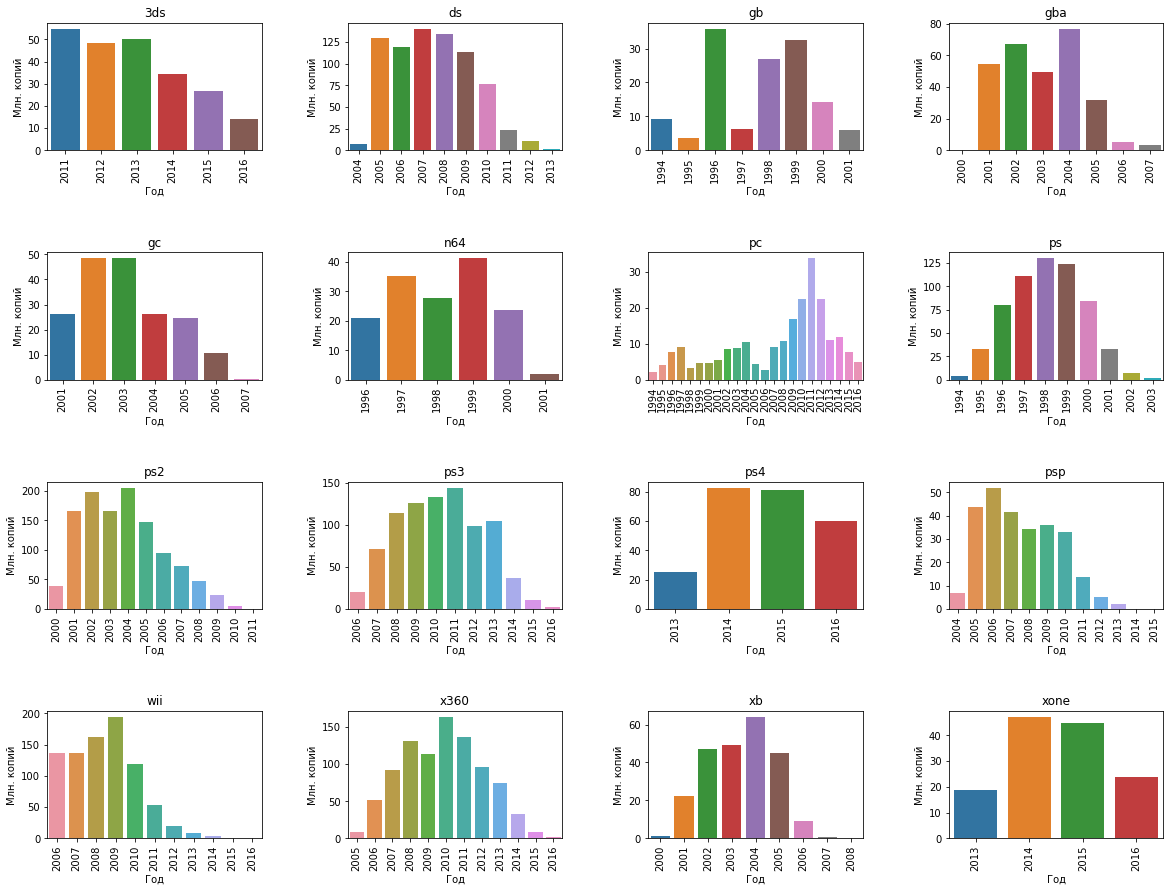

<Figure size 432x288 with 0 Axes>

In [53]:
#В цикле сделаем срез по каждому названию и построим отдельные графики:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.8, wspace=0.4)


for name in df_platform_gr['platform'].unique():
    plt.subplot(a, b, c)
    plt.title(name)
    ax = sns.barplot(x="year_of_release", y="total_sales",
                        data=df_platform_gr[df_platform_gr['platform'] == name])
    ax.set_xlabel('Год')
    ax.set_ylabel('Mлн. копий')
    plt.xticks(rotation=90)
    c = c + 1

plt.show()
plt.tight_layout()

In [54]:
old_games = (df_platform_gr.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'max')
             .reset_index().query('year_of_release < 2016')['platform'].unique()
            )
games = (df_platform_gr.query('platform in @old_games')
         .pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'count')
        )
games.median()

year_of_release    9.0
dtype: float64

Исходя из графика и своной таблицы, мы видим, что в среднем новые платформы появляются и исчезают в течение около 9 лет. Пик наступает по-разному в зависимости от платформы, и скорее всего в зависимости от рекламной кампании. Пик продаж наступает через 1-5 лет, поэтому нам интересен период за последние 5 лет, за который мы проанализируем поведение популярности и продаваемости игр по платформам и определим наиболее перспективные.

Возьмем срез данных начиная с 2010 года.

In [55]:
df_actual = df.query('year_of_release >= 2010')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age,total_sales
13,2010 fifa world cup south africa,ps3,2010.0,Sports,0.300049,0.640137,0.070007,0.219971,82.0,7.800781,E,1.230469
14,2010 fifa world cup south africa,psp,2010.0,Sports,0.090027,0.219971,0.029999,0.119995,69.0,7.398438,E,0.459961
15,2010 fifa world cup south africa,wii,2010.0,Sports,0.229980,0.150024,0.010002,0.040009,70.0,6.699219,E,0.429932
16,2010 fifa world cup south africa,x360,2010.0,Sports,0.320068,0.419922,0.020004,0.090027,83.0,8.101562,E,0.850098
17,2014 fifa world cup brazil,ps3,2014.0,Sports,0.150024,0.360107,0.010002,0.090027,73.0,4.300781,E,0.609863
...,...,...,...,...,...,...,...,...,...,...,...,...
14727,the longest 5 minutes,psv,2016.0,Action,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002
14730,storm: frontline nation,pc,2011.0,Strategy,0.000000,0.010002,0.000000,0.000000,60.0,7.199219,E10+,0.010002
14731,strawberry nauts,psv,2016.0,Adventure,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002
14734,aiyoku no eustia,psv,2014.0,Misc,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002


In [56]:
df_actual_gr = df_actual.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
df_actual_gr['year_of_release'] = df_actual_gr['year_of_release'].astype('int16')
df_actual_gr

,platform,year_of_release,total_sales
0,3ds,2011,54.750000
1,3ds,2012,48.375000
2,3ds,2013,50.156250
3,3ds,2014,34.406250
4,3ds,2015,26.921875
...,...,...,...
60,x360,2016,1.490234
61,xone,2013,18.593750
62,xone,2014,47.093750
63,xone,2015,44.906250


In [57]:
len(df_actual_gr['platform'].unique())

12

In [58]:
df_actual['platform'].unique()

array(['ps3', 'psp', 'wii', 'x360', 'ps4', 'xone', 'pc', '3ds', 'psv',
       'ds', 'wiiu', 'ps2'], dtype=object)

Посмотрим на поведение параметра продаж по отдельным платформам:

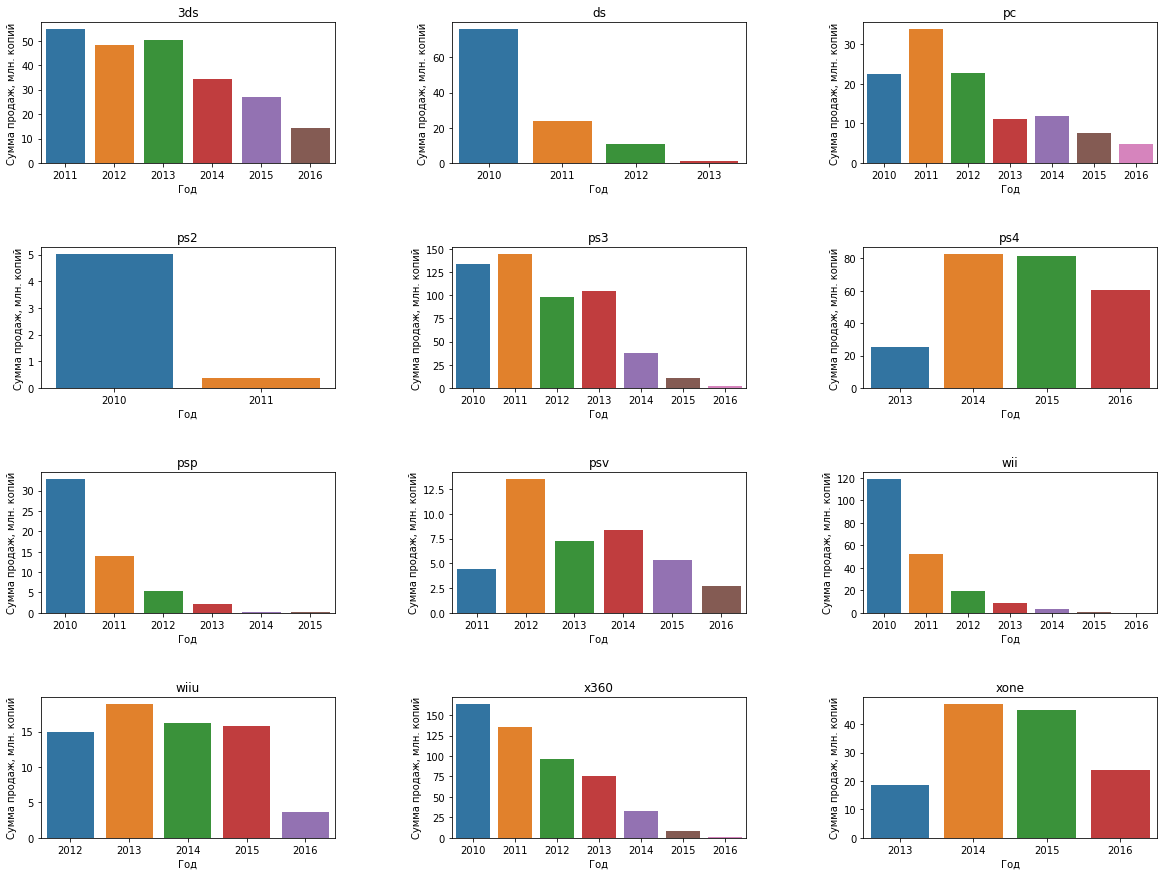

<Figure size 432x288 with 0 Axes>

In [59]:
#В цикле сделаем срез по каждому названию и построим отдельные графики:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.6, wspace=0.4)


for name in df_actual_gr['platform'].unique():
    plt.subplot(a, b, c)
    plt.title(name)
    ax = sns.barplot(x="year_of_release", y="total_sales",
                        data=df_actual_gr[df_actual_gr['platform'] == name])
    ax.set_xlabel('Год')
    ax.set_ylabel('Сумма продаж, млн. копий')
    c = c + 1

plt.show()
plt.tight_layout()


    
    

Суммарные продажи на платформах за 2016 год.

In [60]:
df.query('year_of_release == 2016').pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index().sort_values(by = 'total_sales', ascending = False)

,platform,total_sales
3,ps4,60.250000
8,xone,23.750000
0,3ds,14.164062
1,pc,4.890625
6,wiiu,3.589844
4,psv,2.720703
2,ps3,2.109375
7,x360,1.490234
5,wii,0.179932


Исходя из графиков, мы видим, что среди платформ нет таких, которые имели бы пик продаж в 2016 году. Поэтому, следует взять такие, у которых в 2016 году уровень продаж находится на достаточно высоком уровне, а также не наблюдалось сильного спада.

Из 12 топовых по продажам платформ с данными начиная с 2012 года, выделим ps4, xone, 3ds, psv и wiiu как потециально прибыльные, платформа pc хоть и показала высокие продажи за 2016 год, для нее наблюдается сильный спад продаж.

In [61]:
five = ['3ds', 'ps4', 'psv', 'wiiu', 'xone']
df_five = df_actual.query('platform in @five')

In [62]:
df_five

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age,total_sales
28,7 days to die,ps4,2016.0,Action,0.040009,0.080017,0.000000,0.020004,45.0,5.898438,M,0.140015
29,7 days to die,xone,2016.0,Action,0.029999,0.020004,0.000000,0.000000,35.0,5.199219,M,0.049988
45,adventure time: the secret of the nameless kin...,3ds,2014.0,Action,0.000000,0.070007,0.000000,0.000000,65.0,5.601562,E10+,0.070007
48,aegis of earth: protonovus assault,ps4,2016.0,Action,0.020004,0.000000,0.000000,0.000000,57.0,7.800781,T,0.020004
49,aegis of earth: protonovus assault,psv,2016.0,Action,0.010002,0.010002,0.000000,0.010002,NaN,8.296875,T,0.029999
...,...,...,...,...,...,...,...,...,...,...,...,...
14719,outdoors unleashed: africa 3d,3ds,2011.0,Sports,0.010002,0.000000,0.000000,0.000000,NaN,NaN,T,0.010002
14727,the longest 5 minutes,psv,2016.0,Action,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002
14731,strawberry nauts,psv,2016.0,Adventure,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002
14734,aiyoku no eustia,psv,2014.0,Misc,0.000000,0.000000,0.010002,0.000000,NaN,NaN,NaN,0.010002


Построим ящики с усами по данным:

Text(0.5, 0, 'Платформа')

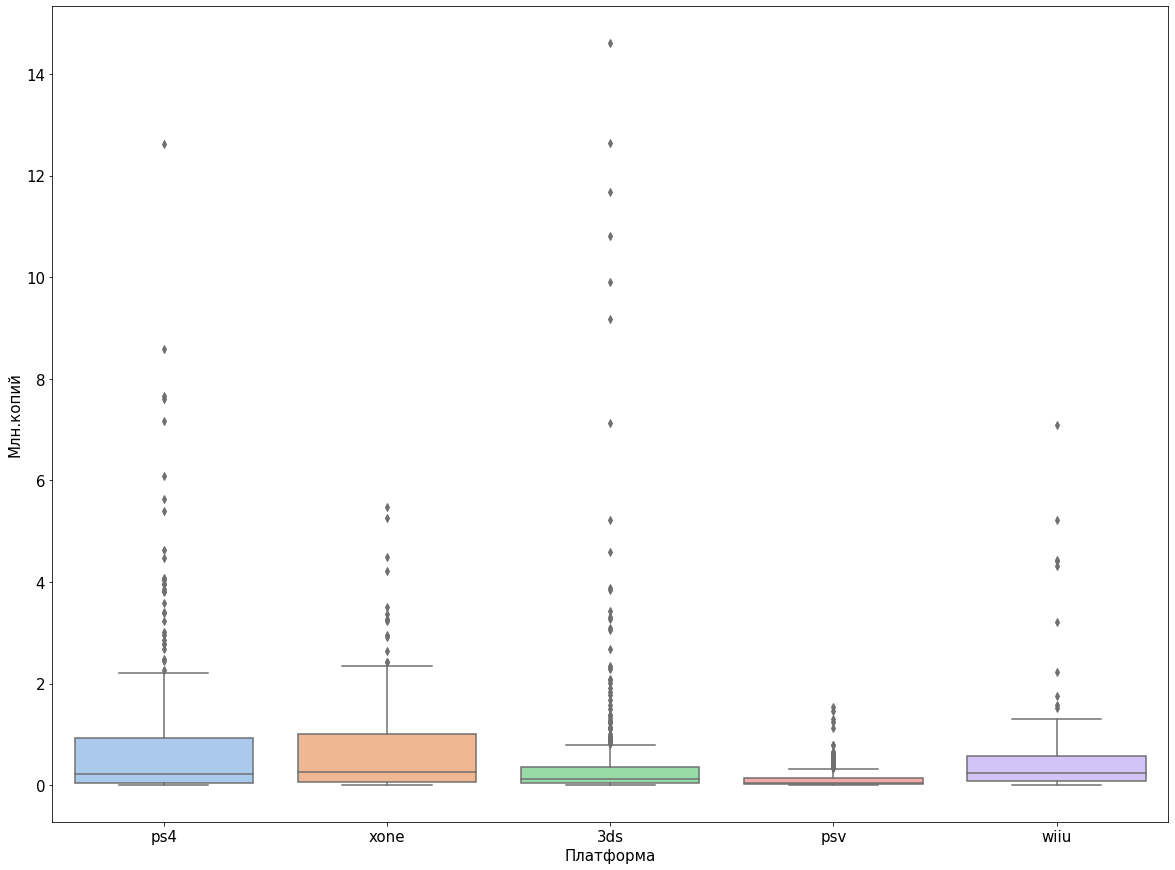

In [63]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x = 'platform', y="total_sales", 
               data=df_five, palette = 'pastel')
ax.tick_params(labelsize = 15)
plt.ylabel('Млн.копий', fontsize=15)
plt.xlabel('Платформа', fontsize=15)

Из графиков видно, что для всех платформ есть выбросы: отдельные игры, которые имели очень большое количество продаж, по сравнению с остальными. Эти выбросы могли оказать негативное влияние и на восприятие графиков с общим количеством проданных копий, на основе которых мы выявили потенциально прибыльные платформы.

Удалять данные выбросы некорректно, так как они отражают отдельные популярные игры, которые скорее всего останутся на рынке и , следовательно, будут влиять на успешность отдельных платформ.

Также, можно заключить, что на платформах 3ds и ps4 больше отдельных игр, имеющих очень высокие показатели продаж, что делает эти платформы более прибыльными. 

Разница между платформами формируется под влиянием многих факторов, например, некоторые платформы дешевле других. Или же, если платформа является продолжением аналогичного предшественника того же брэнда, покупатели будут склонны к покупке новой версии, для которой у них уже есть игры. Также, на разницу могут влиять определенные уникальные характеристики платформы и рекламная кампания. 



In [64]:
df_five.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_age,total_sales
28,7 days to die,ps4,2016.0,Action,0.040009,0.080017,0.0,0.020004,45.0,5.898438,M,0.140015
29,7 days to die,xone,2016.0,Action,0.029999,0.020004,0.0,0.000000,35.0,5.199219,M,0.049988
45,adventure time: the secret of the nameless kin...,3ds,2014.0,Action,0.000000,0.070007,0.0,0.000000,65.0,5.601562,E10+,0.070007
48,aegis of earth: protonovus assault,ps4,2016.0,Action,0.020004,0.000000,0.0,0.000000,57.0,7.800781,T,0.020004
49,aegis of earth: protonovus assault,psv,2016.0,Action,0.010002,0.010002,0.0,0.010002,NaN,8.296875,T,0.029999


**Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**
Для этого построим диаграммы рассеяния внутри платформ для данных из столбцов critic_score и user_score и столбца с данными о продажах. 

1. Влияние отзывов критиков на продажи игр.

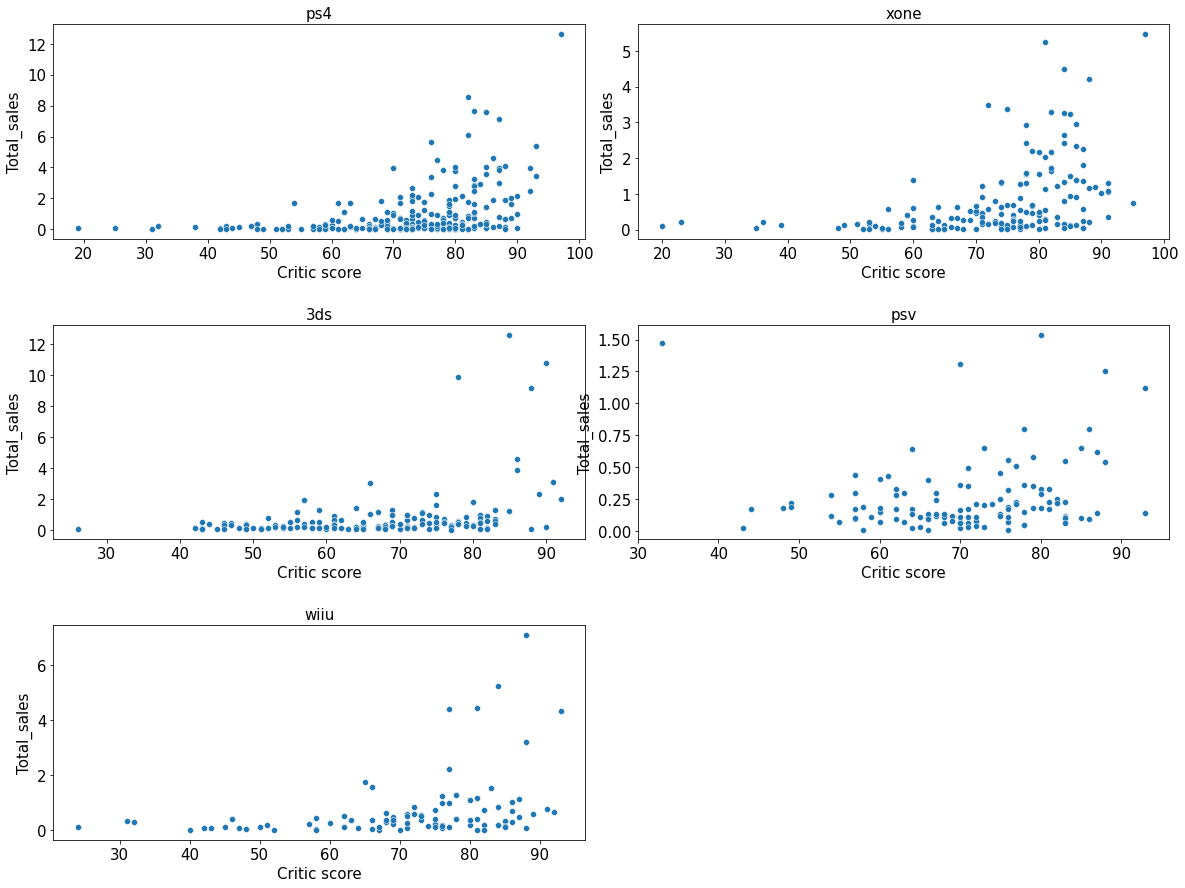

<Figure size 432x288 with 0 Axes>

In [65]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for name in df_five['platform'].unique():
    df_five.sort_values(by = 'critic_score')
    plt.subplot(a, b, c)
    plt.title(name, fontsize=15)
    ax = sns.scatterplot(x="critic_score", y="total_sales",
               data=df_five[df_five['platform'] == name])
    ax.tick_params(labelsize = 15)
    plt.xlabel('Critic score', fontsize=15)
    plt.ylabel('Total_sales', fontsize=15)
    c = c + 1

plt.show()
plt.tight_layout()


2. Влияние отзывов пользователей на продажи игр.

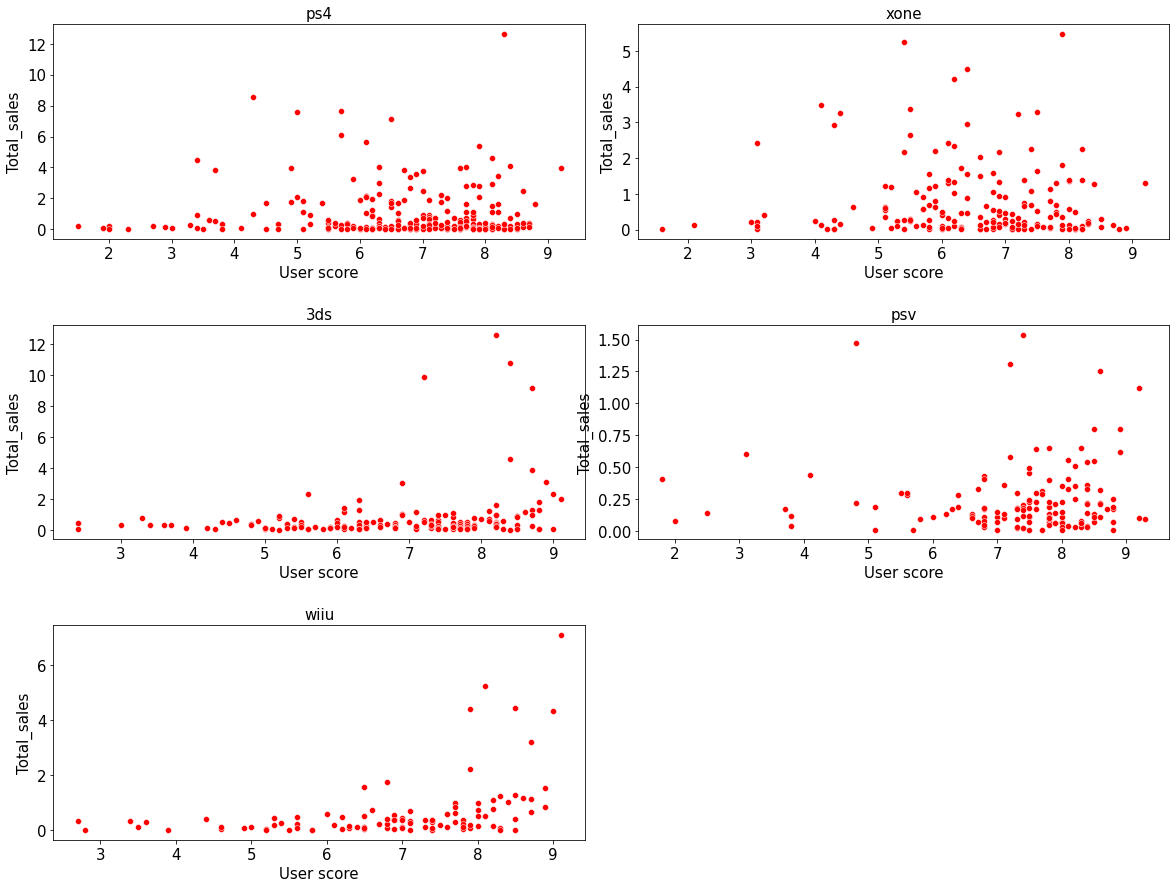

<Figure size 432x288 with 0 Axes>

In [66]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for name in df_five['platform'].unique():
    df_five.sort_values(by = 'user_score')
    plt.subplot(a, b, c)
    plt.title(name, fontsize=15)
    ax = sns.scatterplot(x="user_score", y="total_sales",
               data=df_five[df_five['platform'] == name], color = 'red')
    ax.tick_params(labelsize = 15)
    plt.xlabel('User score', fontsize=15)
    plt.ylabel('Total_sales', fontsize=15)
    c = c + 1

plt.show()
plt.tight_layout()

Видно, что как отзывы критиков, так и отзывы пользователей окаывают слабое положительное влияние на продажи игр на некоторых платформах. Посмотрим на значения корреляции для этих показателей и сделаем выводы.

In [67]:
corr_df_five = df_five[['platform', 'critic_score', 'user_score', 'total_sales']]
for name in corr_df_five['platform'].unique():
    print(name, ':')
    display(corr_df_five[corr_df_five['platform'] == name].corr())

ps4 :


,critic_score,user_score,total_sales
critic_score,1.000000,0.562865,0.403808
user_score,0.562865,1.000000,-0.027458
total_sales,0.403808,-0.027458,1.000000


xone :


,critic_score,user_score,total_sales
critic_score,1.000000,0.491174,0.412046
user_score,0.491174,1.000000,-0.053510
total_sales,0.412046,-0.053510,1.000000


3ds :


,critic_score,user_score,total_sales
critic_score,1.000000,0.745261,0.348744
user_score,0.745261,1.000000,0.222129
total_sales,0.348744,0.222129,1.000000


psv :


,critic_score,user_score,total_sales
critic_score,1.000000,0.734347,0.131781
user_score,0.734347,1.000000,0.013569
total_sales,0.131781,0.013569,1.000000


wiiu :


,critic_score,user_score,total_sales
critic_score,1.000000,0.770158,0.348330
user_score,0.770158,1.000000,0.400276
total_sales,0.348330,0.400276,1.000000


Посмотрим на общее количество игр для разных платформ, чтобы лучше понять полученные результаты.

In [68]:
df_five.pivot_table(index = 'platform', values = 'name', aggfunc = 'count')

,name
platform,
3ds,453
ps4,283
psv,324
wiiu,115
xone,190


Так, исходя из таблиц корреляции видно, что для всех платформ, кроме wiiu, отзывы критиков имеют больший эффект на продажи игр, по сравнению с отзывами пользователей. Отзывы критиков положительно коррелируют с продажами игр на всех платформах, однако связь слабая (или очень слабая в случае с платформой psv). Отзывы пользователей не оказывают никакого влияния на продаваемость игр для платформ PS Vita, PS4 и Xbox One, очень слабо и слабо влияют на данный показатель для платформы 3DS и положительно но слабо коррелируют с продажами игр на платформе Wii U, соответственно.

Можно предположить, что популярность платформы в целом влияет на корреляцию продаж и отзывов пользователей. Так, Wii U не самая популярная платформа, ассортимент игр на ней наименьший, и она имеет самое высокое значение корреляции с млн. проданных копий. Наоборот, платформы Xbox One и PS4 довольно популярны, и корреляции между отзывами пользователей и продажами не наблюдается. Однако, на данный показатель могут оказывать влияние и другие факторы, например, год выпуска или успешность предшественника и т.д. 


**Далее посмотрим на общее распределение игр по жанрам.** 

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сгруппируем данные таблицы df_five по жанру:

In [69]:
df_five_genre = df_five.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').reset_index()
df_five_genre.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True)

,genre,total_sales
0,Action,189.500000
1,Shooter,122.937500
2,Role-Playing,117.687500
3,Sports,92.437500
4,Platform,61.250000
5,Racing,40.500000
6,Misc,31.843750
7,Simulation,28.078125
8,Fighting,15.593750
9,Adventure,12.742188


In [70]:
(df_five_genre[df_five_genre['genre'] == 'Action']['total_sales'])/ df_five_genre['total_sales'].sum()

0    0.261963
Name: total_sales, dtype: float16

In [71]:
(df_five_genre[df_five_genre['genre'] == 'Shooter']['total_sales'])/ df_five_genre['total_sales'].sum()

8    0.169922
Name: total_sales, dtype: float16

In [72]:
(df_five_genre[df_five_genre['genre'] == 'Role-Playing']['total_sales'])/ df_five_genre['total_sales'].sum()

7    0.16272
Name: total_sales, dtype: float16

In [73]:
(df_five_genre[df_five_genre['genre'] == 'Sports']['total_sales'])/ df_five_genre['total_sales'].sum()

10    0.127808
Name: total_sales, dtype: float16

In [74]:
(df_five_genre[df_five_genre['genre'] == 'Platform']['total_sales'])/ df_five_genre['total_sales'].sum()

4    0.084656
Name: total_sales, dtype: float16

Наиболее популярный жанр - Action. Продажи игр с данным жанром примерно на 35% выше второго по списку жанра - Shooter. В целом, экшн(26.19%), стрелялки(16.99%), ролевые(16.27%) и спортивные игры(12.78%) наиболее популярны и имеют больше всего продаж. 

Из наименее популярных, выделим игры относящиеся к стратегиям, паззлам, приключениям и дракам. 

## Портрет пользователя<a id='customerid'></a>
### Популярные платформы<a id='platformsid'></a>
Создадим сводную таблицу по продажам игр разных платформ в зависимости от региона:

In [75]:
df_sales_regions = df.pivot_table(index = 'platform', 
                                       values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
                                       aggfunc = 'sum').reset_index()
df_sales_regions

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,3do,0.000000,0.099976,0.000000,0.000000,0.099976
1,3ds,54.093750,90.437500,72.625000,11.640625,228.750000
2,dc,1.179688,7.628906,4.328125,0.190063,13.328125
3,ds,172.250000,170.250000,356.250000,54.687500,753.500000
4,gb,30.046875,51.843750,47.906250,4.710938,134.500000
5,gba,68.875000,44.125000,168.250000,6.890625,288.250000
6,gc,36.062500,19.843750,124.437500,4.871094,185.250000
7,gen,0.899902,1.320312,2.259766,0.189941,4.671875
8,n64,27.687500,27.937500,92.000000,3.269531,150.875000
9,nes,0.439941,1.279297,1.940430,0.059998,3.720703


In [76]:
df_sales_regions.columns

Index(['platform', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales',
       'total_sales'],
      dtype='object')

Добавим столбцы с процентом от общих продаж:

In [77]:
lambdafunc = lambda x: pd.Series(["{:.2f}".format(x['eu_sales']/x['total_sales']*100),
                                  "{:.2f}".format(x['jp_sales']/x['total_sales']*100),
                                  "{:.2f}".format(x['na_sales']/x['total_sales']*100),
                                  "{:.2f}".format(x['other_sales']/x['total_sales']*100)])
df_sales_regions[['eu_per', 'jp_per', 'na_per', 'other_per']] = df_sales_regions.apply(lambdafunc, axis=1)
df_sales_regions = df_sales_regions.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True)
df_sales_regions

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_per,jp_per,na_per,other_per
0,ps2,312.000000,126.250000,548.000000,176.500000,1163.000000,26.83,10.86,47.12,15.18
1,x360,249.875000,11.351562,568.500000,80.250000,910.000000,27.46,1.25,62.47,8.82
2,ps3,301.000000,66.625000,371.000000,125.125000,863.500000,34.86,7.72,42.96,14.49
3,wii,240.000000,64.500000,457.000000,72.562500,834.000000,28.78,7.73,54.80,8.70
4,ds,172.250000,170.250000,356.250000,54.687500,753.500000,22.86,22.59,47.28,7.26
5,ps,180.375000,122.125000,272.000000,34.562500,609.000000,29.62,20.05,44.66,5.68
6,gba,68.875000,44.125000,168.250000,6.890625,288.250000,23.89,15.31,58.37,2.39
7,psp,61.250000,66.875000,102.437500,38.312500,269.000000,22.77,24.86,38.08,14.24
8,ps4,114.437500,10.367188,86.000000,38.593750,249.375000,45.89,4.16,34.49,15.48
9,xb,56.281250,1.370117,172.875000,7.992188,238.500000,23.60,0.57,72.48,3.35


5 платформ (ng, ws, tg16, 3do, pcfx) существуют только в Японии.

Теперь найдем 5 самых популярных игр для каждого из регионов (европа, Япония, Северная Америка):


In [78]:
top_eu = df_sales_regions.sort_values(by = 'eu_sales', ascending = False).head()
top_na = df_sales_regions.sort_values(by = 'na_sales', ascending = False).head()
top_jp = df_sales_regions.sort_values(by = 'jp_sales', ascending = False).head()
display(top_eu[['platform', 'eu_sales', 'jp_sales', 'na_sales', 'eu_per', 'jp_per', 'na_per']], 
        top_jp[['platform', 'eu_sales', 'jp_sales', 'na_sales', 'eu_per', 'jp_per', 'na_per']], 
        top_na[['platform', 'eu_sales', 'jp_sales', 'na_sales', 'eu_per', 'jp_per', 'na_per']])

,platform,eu_sales,jp_sales,na_sales,eu_per,jp_per,na_per
0,ps2,312.000,126.250000,548.0,26.83,10.86,47.12
2,ps3,301.000,66.625000,371.0,34.86,7.72,42.96
1,x360,249.875,11.351562,568.5,27.46,1.25,62.47
3,wii,240.000,64.500000,457.0,28.78,7.73,54.80
5,ps,180.375,122.125000,272.0,29.62,20.05,44.66


,platform,eu_sales,jp_sales,na_sales,eu_per,jp_per,na_per
4,ds,172.25000,170.2500,356.25000,22.86,22.59,47.28
0,ps2,312.00000,126.2500,548.00000,26.83,10.86,47.12
5,ps,180.37500,122.1250,272.00000,29.62,20.05,44.66
10,3ds,54.09375,90.4375,72.62500,23.65,39.54,31.75
16,snes,5.53125,66.8750,17.84375,6.07,73.39,19.58


,platform,eu_sales,jp_sales,na_sales,eu_per,jp_per,na_per
1,x360,249.875,11.351562,568.50,27.46,1.25,62.47
0,ps2,312.000,126.250000,548.00,26.83,10.86,47.12
3,wii,240.000,64.500000,457.00,28.78,7.73,54.80
2,ps3,301.000,66.625000,371.00,34.86,7.72,42.96
4,ds,172.250,170.250000,356.25,22.86,22.59,47.28


В Европе наиболее популярные платформы: ps2, ps3, x360, wii, **ps**.

В Северной Америке - x360, ps2, wii, ps3, **ds**.

В Японии - ds, ps2, ps, 3ds, psp.

Как мы видим, в Европе и Америке 4 наиболее популярные платформы схожи. Однако в Японии список популярных платформ отличается: наиболее популярна ds,которая занимает пятую по популярности позицию в Штатах и отсутствует в пяти топовых платформах Европы. Также, в Японии присутствуют две платформы: 3ds и psp, которых нет в списке топовых платформ Штатов и Европы. Платформу ps2 можно выделить как наиболее популярную в целом. 

Доли продаж показывают, что в целом в Штатах продажи игр гораздо выше, чем в Европе и Японии, и составляют около половины всех продаж по топовым платформам. В таблице с топовыми платформами Японии мы видим, что процент продаж платформ 3ds и psp в Штатах ниже 40%, что говорит о том, что данные платформы популярны в Японии гораздо больше, чем в США, учитывая размеры стран. Подобный вывод можно сделать о платформе ps2 в Европе. 

### Популярные жанры<a id='genresid'></a>
Создадим сводную таблицу по жанрам для разных регионов.

In [79]:
df_genres = df.pivot_table(index = 'genre', 
                           values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
                           aggfunc = 'sum').reset_index()


Добавим столбцы с процентом от общих продаж:

In [80]:
lambdafunc = lambda x: pd.Series(["{:.2f}".format(x['eu_sales']/x['total_sales']*100),
                                  "{:.2f}".format(x['jp_sales']/x['total_sales']*100),
                                  "{:.2f}".format(x['na_sales']/x['total_sales']*100),
                                  "{:.2f}".format(x['other_sales']/x['total_sales']*100)])
df_genres[['eu_per', 'jp_per', 'na_per', 'other_per']] = df_genres.apply(lambdafunc, axis=1)
df_genres = df_genres.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True)
df_genres

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_per,jp_per,na_per,other_per
0,Action,447.50000,130.125000,722.50000,165.875000,1466.000,30.53,8.88,49.28,11.31
1,Sports,327.50000,94.562500,606.50000,119.125000,1148.000,28.53,8.24,52.83,10.38
2,Shooter,285.00000,30.453125,497.50000,94.437500,907.500,31.40,3.36,54.82,10.41
3,Role-Playing,180.00000,287.250000,316.75000,54.187500,838.000,21.48,34.28,37.80,6.47
4,Misc,187.25000,96.500000,357.00000,63.656250,704.500,26.58,13.70,50.67,9.04
5,Racing,209.25000,45.750000,315.75000,68.812500,639.500,32.72,7.15,49.37,10.76
6,Platform,153.50000,75.875000,289.75000,42.093750,561.000,27.36,13.52,51.65,7.50
7,Simulation,108.25000,58.718750,171.25000,29.468750,367.750,29.44,15.97,46.57,8.01
8,Fighting,81.81250,65.625000,177.12500,31.375000,356.000,22.98,18.43,49.75,8.81
9,Adventure,50.00000,40.375000,83.93750,14.171875,188.500,26.53,21.42,44.53,7.52


Наблюдаем похожее процентное соотношение: в Северной америке продажи примерно в два раза больше. 

Посмотрим на 5 самых популярных жанра для каждого региона: Европы, Северной Америки, Японии.

In [81]:
topg_eu = df_genres.sort_values(by = 'eu_sales', ascending = False).head().reset_index(drop = True)
topg_na = df_genres.sort_values(by = 'na_sales', ascending = False).head().reset_index(drop = True)
topg_jp = df_genres.sort_values(by = 'jp_sales', ascending = False).head().reset_index(drop = True)
display(topg_eu, topg_na, topg_jp)

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_per,jp_per,na_per,other_per
0,Action,447.50,130.125000,722.50,165.87500,1466.0,30.53,8.88,49.28,11.31
1,Sports,327.50,94.562500,606.50,119.12500,1148.0,28.53,8.24,52.83,10.38
2,Shooter,285.00,30.453125,497.50,94.43750,907.5,31.40,3.36,54.82,10.41
3,Racing,209.25,45.750000,315.75,68.81250,639.5,32.72,7.15,49.37,10.76
4,Misc,187.25,96.500000,357.00,63.65625,704.5,26.58,13.70,50.67,9.04


,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_per,jp_per,na_per,other_per
0,Action,447.50,130.125000,722.50,165.87500,1466.0,30.53,8.88,49.28,11.31
1,Sports,327.50,94.562500,606.50,119.12500,1148.0,28.53,8.24,52.83,10.38
2,Shooter,285.00,30.453125,497.50,94.43750,907.5,31.40,3.36,54.82,10.41
3,Misc,187.25,96.500000,357.00,63.65625,704.5,26.58,13.70,50.67,9.04
4,Role-Playing,180.00,287.250000,316.75,54.18750,838.0,21.48,34.28,37.80,6.47


,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_per,jp_per,na_per,other_per
0,Role-Playing,180.00,287.2500,316.75,54.18750,838.0,21.48,34.28,37.80,6.47
1,Action,447.50,130.1250,722.50,165.87500,1466.0,30.53,8.88,49.28,11.31
2,Misc,187.25,96.5000,357.00,63.65625,704.5,26.58,13.70,50.67,9.04
3,Sports,327.50,94.5625,606.50,119.12500,1148.0,28.53,8.24,52.83,10.38
4,Platform,153.50,75.8750,289.75,42.09375,561.0,27.36,13.52,51.65,7.50


Визуализируем данные:


In [82]:
genre_vis = df_genres[['genre', 'eu_sales', 'na_sales', 'jp_sales', 'other_sales']]
genre_vis

,genre,eu_sales,na_sales,jp_sales,other_sales
0,Action,447.50000,722.50000,130.125000,165.875000
1,Sports,327.50000,606.50000,94.562500,119.125000
2,Shooter,285.00000,497.50000,30.453125,94.437500
3,Role-Playing,180.00000,316.75000,287.250000,54.187500
4,Misc,187.25000,357.00000,96.500000,63.656250
5,Racing,209.25000,315.75000,45.750000,68.812500
6,Platform,153.50000,289.75000,75.875000,42.093750
7,Simulation,108.25000,171.25000,58.718750,29.468750
8,Fighting,81.81250,177.12500,65.625000,31.375000
9,Adventure,50.00000,83.93750,40.375000,14.171875


In [83]:
#Поменяем местами столбцы и строки
df_t = genre_vis.T.reset_index()

In [84]:
d = {'index':'genre', 0:'Action', 1:'Sports', 2:'Shooter', 3:'Role-Playing', 
    4:'Misc', 5:'Racing', 6:'Platform', 7:'Simulation',
    8:'Fighting', 9:'Adventure', 10:'Strategy', 11:'Puzzle'}
df_t.rename(columns = d, inplace = True)
df_t = df_t.loc[1:]
df_t

,genre,Action,Sports,Shooter,Role-Playing,Misc,Racing,Platform,Simulation,Fighting,Adventure,Strategy,Puzzle
1,eu_sales,447.5,327.5,285.0,180.0,187.25,209.25,153.5,108.25,81.8125,50.0,40.71875,41.78125
2,na_sales,722.5,606.5,497.5,316.75,357.0,315.75,289.75,171.25,177.125,83.9375,63.78125,69.875
3,jp_sales,130.125,94.5625,30.453125,287.25,96.5,45.75,75.875,58.71875,65.625,40.375,43.4375,35.6875
4,other_sales,165.875,119.125,94.4375,54.1875,63.65625,68.8125,42.09375,29.46875,31.375,14.171875,10.171875,10.609375


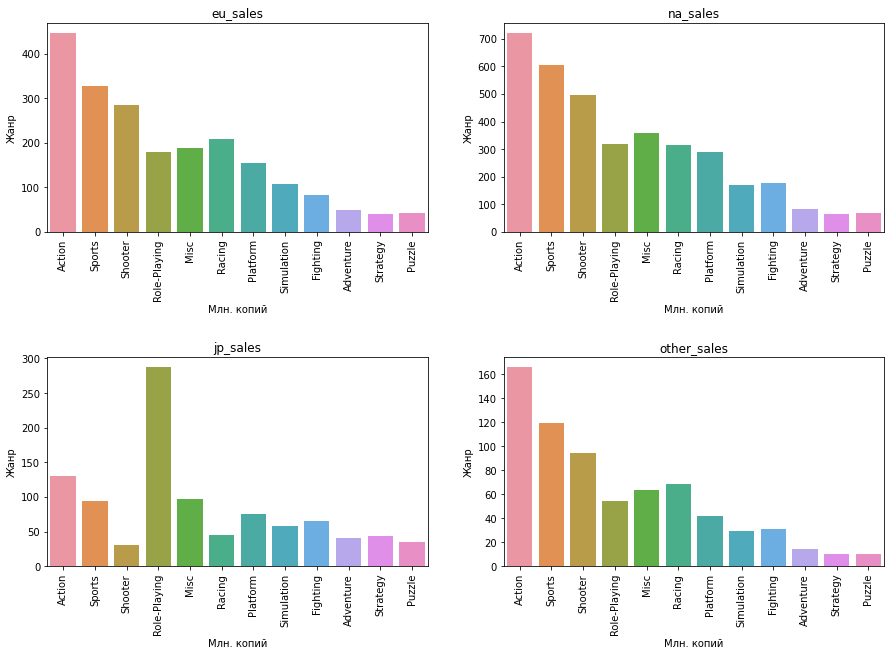

<Figure size 432x288 with 0 Axes>

In [85]:
#В цикле сделаем срез по каждому названию и построим отдельные графики:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.6, wspace=0.2)


for name in df_t['genre'].unique():
    plt.subplot(a, b, c)
    plt.title(name)
    ax = sns.barplot(data=df_t[df_t['genre'] == name])
    ax.set_xlabel('Млн. копий')
    ax.set_ylabel('Жанр')
    plt.xticks(rotation=90)
    c = c + 1

plt.show()
plt.tight_layout()

Самые популярные жанры:
* **в Европе:** экшн, спорт, стрелялки, гонки, Misc.
* **в Северной Америке:** экшн, спорт, стрелялки, misc, ролевые.
* **в Японии:** ролевые, экшн, Misc, спорт, platform. 


В целом, в Штатах и Европе 4 из 5 топовых жанров одинаковы. В Штатах ролевые игры входят в 5 топ жанров, а в Европе - гонки. В целом, смотря на график сверху, можно отметить, что в Европе и США в целом распределение продаж по жанрам похоже, в то время как в Японии это распределение очень сильно отличается. 

В Японии наиболее популярный жанр - ролевые игры, которые занимают лишь пятое место в Штатах и отсутствуют в списке пяти топ-жанров Европы. Также присутствует жанр Platform, который занимает 7-е место в Северной Америке и Европе. 

Отличие Японии от США и Европы можно объяснить огромной разницей в культуре и менталитете.

### Рейтинг ESRB<a id='ersbid'></a>
**Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.**

Заменим пропущенные значения в столбце рейтинга на 'unknown':


In [86]:
df['rating_age'].fillna('unknown', inplace = True)

C:\Python\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Сгруппируем данные по рейтингу:

In [87]:
ersb = df.pivot_table(index = 'rating_age', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
                      aggfunc = 'sum').reset_index()
ersb = ersb.sort_values(by = 'total_sales',ascending = False)
ersb

,rating_age,eu_sales,jp_sales,na_sales,other_sales,total_sales
1,E,704.000000,198.000000,1273.000000,231.375000,2406.000000
8,unknown,323.500000,550.500000,557.500000,71.375000,1502.000000
7,T,421.000000,150.750000,747.500000,153.000000,1472.000000
5,M,480.000000,63.593750,743.000000,176.125000,1462.000000
2,E10+,183.375000,40.187500,345.500000,71.937500,641.000000
4,K-A,0.270020,1.459961,2.560547,0.029999,4.320312
0,AO,0.609863,0.000000,1.259766,0.090027,1.958984
3,EC,0.110046,0.000000,1.530273,0.109985,1.750000
6,RP,0.029999,0.000000,0.000000,0.010002,0.040009


In [88]:
ersb_t = ersb.T.reset_index()
ersb_t

,index,1,8,7,5,2,4,0,3,6
0,rating_age,E,unknown,T,M,E10+,K-A,AO,EC,RP
1,eu_sales,704.0,323.5,421.0,480.0,183.375,0.27002,0.609863,0.110046,0.029999
2,jp_sales,198.0,550.5,150.75,63.59375,40.1875,1.459961,0.0,0.0,0.0
3,na_sales,1273.0,557.5,747.5,743.0,345.5,2.560547,1.259766,1.530273,0.0
4,other_sales,231.375,71.375,153.0,176.125,71.9375,0.029999,0.090027,0.109985,0.010002
5,total_sales,2406.0,1502.0,1472.0,1462.0,641.0,4.320312,1.958984,1.75,0.040009


In [89]:
d = {'index':'ERSB', 0:'AO', 1:'E', 2:'E10+', 3:'EC', 
    4:'K-A', 5:'M', 6:'RP', 7:'T',
    8:'unknown'}
ersb_t.rename(columns = d, inplace = True)
ersb_t = ersb_t.loc[1:4]
ersb_t

,ERSB,E,unknown,T,M,E10+,K-A,AO,EC,RP
1,eu_sales,704.0,323.5,421.0,480.0,183.375,0.27002,0.609863,0.110046,0.029999
2,jp_sales,198.0,550.5,150.75,63.59375,40.1875,1.459961,0.0,0.0,0.0
3,na_sales,1273.0,557.5,747.5,743.0,345.5,2.560547,1.259766,1.530273,0.0
4,other_sales,231.375,71.375,153.0,176.125,71.9375,0.029999,0.090027,0.109985,0.010002


Посмотрим на рейтинг ERSB разных регионов:

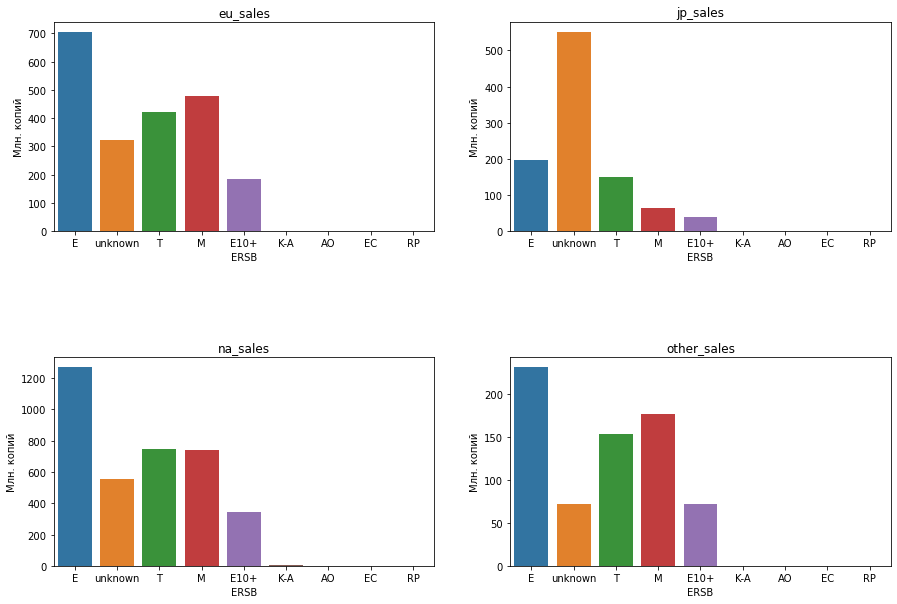

<Figure size 432x288 with 0 Axes>

In [90]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.6, wspace=0.2)


for name in ersb_t['ERSB'].unique():
    plt.subplot(a, b, c)
    plt.title(name)
    ax = sns.barplot(data=ersb_t[ersb_t['ERSB'] == name])
    ax.set_xlabel('ERSB')
    ax.set_ylabel('Млн. копий')
    
    c = c + 1

plt.show()
plt.tight_layout()

Выделяются 4 основных возрастных категории (E, T, M, E10+), внутри которых представлено наибольшее количество продаж. 
* «E» - («Everyone») — «Для всех»
* «T» - («Teen») — «Подросткам»
* «M» - («Mature») — «Для взрослых»
* «E10+» -  («Everyone 10 and older») — «Для всех от 10 лет и старше»

Остальные категории:
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «EC» («Early childhood») — «Для детей младшего возраста»
* "K-A" ("Kids to Adults") - «От детей до взрослых», аналогичен «Е»

Таким образом:
* Во всех регионах наибольшее число продаж составляют игры для всех возрастных категорий.
* В **Японии** игры для подростков более популярны, чем игры для взрослых и для людей старше 10 лет. 
* В **Европе** второе место занимают игры для взрослых, далее идет игры для подростков, и четвертое место занимают игры для всех старше 10 лет. 
* В **Северной Америке** игры для подростков и взрослых имеют одинаковую популярность, а игры категории Е+10 менее популярны. 
* Пропущенные значения в огомном количестве представлены в исходных данных для игр в Японии. (Для Штатов и Европы - примерно одинаковый процент). Это странно.

## Провекра гипотез<a id='hypothesisid'></a>
Статистически проверим:
1. Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC.
2. Различаются ли средние пользовательские рейтинги жанров Action и Sports.

Для проведения t-теста Стьюдента воспользуемся методом **st.ttest_ind()**, т.к. наша цель установить разницу между двумя наборами данных (выборками). 


In [91]:
user_scores = df_actual.pivot_table(index = 'platform', values = 'user_score').reset_index()
user_scores.query('platform == "xone" or  platform == "pc"')

,platform,user_score
2,pc,6.535156
11,xone,6.480469


Для того, чтобы проверить одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC, установим нулевую и альтернативную гипотезы:
* H${0}$: средние пользовательские рейтинги двух платформ одинаковы.
* H${A}$: средние пользовательские рейтинги двух платформ различаются.


Уровень значимости зададим 95%.


In [92]:
pc = df_actual.loc[df['platform'] == 'pc']['user_score']
xone = df_actual.loc[df['platform'] == 'xone']['user_score']
result = st.ttest_ind(pc, xone, nan_policy = 'omit')
alpha = 0.05
print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ  Xbox One и PC различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ  Xbox One и PC одинаковы")

p-значение:  0.7113922013784785
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ  Xbox One и PC одинаковы


Результаты t-теста Стьюдента свидетельствуют об отсутствии статистически достоверной разницы между пользовательскими рейтингами платформ Xbox One и PС.

Далее посмотрим на данные о жанрах Action и Sports:

In [93]:
two_genres = df_actual.pivot_table(index = 'genre', values = 'user_score').reset_index()
two_genres.query('genre == "Action" or  genre == "Sports"')

,genre,user_score
0,Action,6.777344
10,Sports,5.906250


Для того, чтобы проверить различаются ли средние пользовательские рейтинги жанров Action и Sports, установим нулевую и альтернативную гипотезы:
* H${0}$: средние пользовательские рейтинги двух жанров одинаковы.
* H${A}$: средние пользовательские рейтинги двух жанров различаются.

Уровень значимости зададим 95%.

In [94]:
action = df_actual.loc[df['genre'] == 'Action']['user_score']
sports = df_actual.loc[df['genre'] == 'Sports']['user_score']
result = st.ttest_ind(action, sports, nan_policy = 'omit')
alpha = 0.05
print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги  жанров Action и Sports различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги  жанров Action и Sports одинаковы")

p-значение:  3.962736258173501e-18
Отвергаем нулевую гипотезу: средние пользовательские рейтинги  жанров Action и Sports различаются


Результаты t-теста Стьюдента свидетельствуют о том, что **пользовательские рейтинги жанров Action и Sports различаются.** Т.е. рейтинг жанра Action выше жанра Sports. 

## Общий вывод.<a id='conclusionid'></a>

1. В ходе данной работы проанализировали данные о продажах и рейтингах компьютерных игр по всему миру с целью выявления потенциально популярных игр и планирования рекламной кампании на 2017 год.
2. В период с 1994 года по настоящее время разные платформы имели различную популярность. В среднем новые платформы появляются и исчезают в течение периода около 10 лет. Пик продаж наступает через 1-6 лет, в зависимости от платформы и, вероятно, проведенных рекламных кампаний. 
3. Начиная с 2010 года, 12 платформ были представлены на мировом рынке. Из них, Play Station 4 (PS4), Xbox One, 3DS, PS Vita и Wii U к 2016 году имели наиболее высокие показатели по продажам за 2016 год, а также наблюдалось наименьшее снижение продаж: 
* PS4 - 60.25 млн. копий
* Xbox One - 23.75 млн. копий
* 3DS - 14.16 млн. копий
* PS Vita - 2.72 млн. копий
* Wii U - 3.58 млн. копий

Также, на платформах PS Vita, 3DS и PS4 больше отдельных игр, имеющих очень высокие показатели продаж, что делает эти платформы более прибыльными. 

4. Как **отзывы критиков**, так и **отзывы пользователей** оказывают слабое положительное влияние на продажи игр на платформах PS4, Xbox One, 3DS, PS Vita и Wii U. При этом, для всех платформ, кроме Wii U, отзывы критиков имеют больший эффект на продажи игр, по сравнению с отзывами пользователей.


5. Среди платформ PS4, Xbox One, 3DS, PS Vita и Wii U наиболее популярные жанры - Action(26%), Shooter(17%), Role-Playing(16%), Sports(13%) и Platform(8%). Наименее популярны Strategy и Puzzle.


6. Был составлен **портрет пользователя для каждого региона**.


* Наиболее популярные платформы:

В **Европе**  PS2, PS2, Xbox 360, Wii, PS. 

В **Северной Америке** - Xbox360, PS2, Wii, PS3, DS. 

В **Японии** - DS, PS2, PS, 3DS, PSP. Платформу PS2 можно выделить как наиболее популярную в целом. 
* В целом в Штатах продажи игр гораздо выше, чем в Европе и Японии, и составляют около половины всех продаж по топовым платформам.
* Самые популярные жанры: 

в **Европе:** Action, Sports, Shooter, Races, Misc.


в **Северной Америке**: Action, Sports, Shooter, Misc, Role_Playing.


в **Японии:** Role_Playing, Action, Misc, Sports, Platform.

* Среди всех **категорий игр**, выделяются 4 наиболее популярные возрастные категории (E, T, M, E10+), внутри которых представлено наибольшее количество продаж.

«E» - («Everyone») — «Для всех»


«T» - («Teen») — «Подросткам»


«M» - («Mature») — «Для взрослых»


«E10+» - («Everyone 10 and older») — «Для всех от 10 лет и старше»

Во всех регионах наибольшее число продаж составляют игры для всех возрастных категорий.


В **Японии** игры для подростков более популярны, чем игры для взрослых и для людей старше 10 лет.


В **Европе** второе место занимают игры для взрослых, далее идет игры для подростков, и четвертое место занимают игры для всех старше 10 лет.


В **Северной Америке** игры для подростков и взрослых имеют одинаковую популярность, а игры категории Е+10 менее популярны.

7. Был проведен **статистический анализ данных**:

a) пользовательские рейтинги игр на платформах PC и Xbox One статистически не различаются.

b) Пользовательские рейтинги жанров Action и Sports статистически различаются. Жанр Action (6.8) имеет более высокий рейтинг по сравнению с жанром Sports (5.8).

**Общий вывод:** рекламные кампании следует планировать по-разному для каждого региона, опираясь на полученные результаты. На 2017 год следует сфокусироваться на продвижении таких платформ, как PS4, Xbox One, 3DS, PS Vita и Wii U. 

**Примечание:** В дополнение интересно было бы провести анализ выбросов на платформах PS4, Xbox One, 3DS, PS Vita и Wii U, чтобы найти наиболее популярные игры в разных регионах. 